## Моделирование молекулярной динамики

   - Система: ГЦК решётка $7\times7\times7$ частиц;
   - Постоянная решётки: $a = 1.75~\sigma $;
   - Потенциал взаимодействия: Леннард-Джонс;
   - Начальная температура: $T_i = 2.8~\varepsilon / k_B$;
   - Конечная температура: $T_f = 10^{-10}~\varepsilon / k_B$;
   - Скорость охлаждения: $v_T = 0.02~\varepsilon / k_B\tau$;
   - Термостат: масштабирование скоростей;
   - Толщина сферического слоя (список Верле): $\Delta r_s = 0.3~\sigma $;
   - Временной шаг: $\Delta t = 0.005~\tau$;
   - Число шагов для охлаждения: 40000;
   - Функция радиального распределения, среднеквадратичное смещение и коэффициент самодиффузии рассчитывалась через каждые 5000 шагов;
   - Подсчёт состоял из 1500 шагов: 500 на уравновешивание системы при фиксированной температуре и 1000 на усреднение по времени и подсчёт функции радиального распределения;
   - Среднеквадратичное смещение и коэффициент самодиффузии вычислялись в течение всех 1500 шагов;

#### Импорт необходимых библиотек

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('seaborn')

#### Путь к файлам с данными

In [2]:
BASE_DIRECTORY = os.path.dirname(os.getcwd())
PATH_TO_ALL_DATA = os.path.join(BASE_DIRECTORY, 'data')
PATH_TO_CURRENT_DATA = os.path.join(PATH_TO_ALL_DATA, '2020-12-21')

In [3]:
rdf_filename = os.path.join(PATH_TO_CURRENT_DATA, 'rdf_T_')
transport_filename = os.path.join(PATH_TO_CURRENT_DATA, 'transport_T_')
parameters_filename = os.path.join(PATH_TO_CURRENT_DATA, 'system_parameters.csv')

#### Температуры, для которых была подчитана функция радиального распределения

In [4]:
temperatures = (
    2.80401,
    2.79211,
)

#### Извлечение значений функции радиального распределения из файлов

In [5]:
rdf_data = pd.DataFrame(columns=['radius'])
msd_data = pd.DataFrame(columns=['time'])
vel_autocor_data = pd.DataFrame(columns=['time'])
einstein_diffusion_data = pd.DataFrame(columns=['time'])
green_kubo_diffusion_data = pd.DataFrame(columns=['time'])

for temperature in temperatures:
    df = pd.read_csv(
        f'{rdf_filename}{temperature:.5f}.csv',
        sep=';',
    )
    rdf_data = rdf_data.merge(
        right=df,
        how='outer',
        on='radius',
    )
    df = pd.read_csv(
        f'{transport_filename}{temperature:.5f}.csv',
        sep=';',
    )
    df['time'] = 0.005 * (1 + df.index.values)
    msd_data = msd_data.merge(
        right=df[['time', 'msd']],
        how='outer',
        on='time',
    )
    vel_autocor_data = vel_autocor_data.merge(
        right=df[['time', 'velocity_autocorrelation']],
        how='outer',
        on='time',
    )
    einstein_diffusion_data = einstein_diffusion_data.merge(
        right=df[['time', 'einstein_diffusion']],
        how='outer',
        on='time',
    )
    green_kubo_diffusion_data = green_kubo_diffusion_data.merge(
        right=df[['time', 'green_kubo_diffusion']],
        how='outer',
        on='time',
    )
    rdf_data = rdf_data.rename(columns={'rdf': f'{temperature:.5f}'})
    msd_data = msd_data.rename(columns={'msd': f'{temperature:.5f}'})
    vel_autocor_data = vel_autocor_data.rename(columns={'velocity_autocorrelation': f'{temperature:.5f}'})
    einstein_diffusion_data = einstein_diffusion_data.rename(columns={'einstein_diffusion': f'{temperature:.5f}'})
    green_kubo_diffusion_data = green_kubo_diffusion_data.rename(columns={'green_kubo_diffusion': f'{temperature:.5f}'})

msd_data

,time,2.80401,2.79211
0,0.005,0.210875,0.209976
1,0.010,0.841245,0.837675
2,0.015,1.884472,1.876533
3,0.020,3.329894,3.316003
4,0.025,5.163362,5.142082
...,...,...,...
995,4.980,7102.021343,7141.354228
996,4.985,7109.182462,7149.037337
997,4.990,7116.343624,7156.718657
998,4.995,7123.504778,7164.397860


#### Графики функций радиального распределения при различных температурах

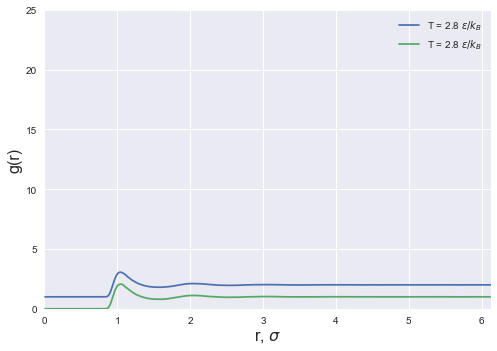

In [6]:
for i, temperature in enumerate(temperatures):
    plt.plot(
        rdf_data['radius'],
        rdf_data[f'{temperature:.5f}'] + 1 * (len(temperatures) - (i + 1)), 
        label=f'T = {temperature:.1f} $\epsilon / k_B $',
    );
    
plt.xlabel('r, $\sigma$', fontsize=16);
plt.ylabel('g(r)', fontsize=16);
plt.xlim(left=0, right=6.125);
plt.ylim(
    bottom=0, 
    top=25,
);
plt.legend();

#### Временная зависимость среднеквадратичного смещения при различных температурах

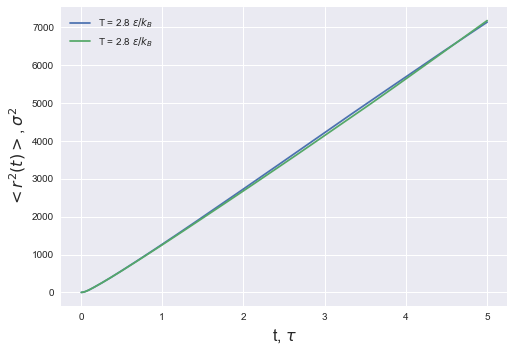

In [7]:
for i, temperature in enumerate(temperatures):
    plt.plot(
        msd_data['time'],
        msd_data[f'{temperature:.5f}'], 
        label=f'T = {temperature:.1f} $\epsilon / k_B $',
    );
    
plt.xlabel(r't, $\tau $', fontsize=16);
plt.ylabel(r'$<r^2(t)>$, $\sigma^2$', fontsize=16);
plt.xlim(
#     left=0, 
#     right=6.125,
);
plt.ylim(
#     bottom=0, 
#     top=20,
);
plt.legend();

#### Временная зависимость автокорреляционнной функции скорости при различных температурах

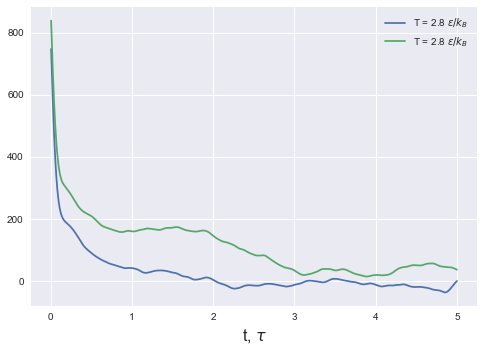

In [8]:
for i, temperature in enumerate(temperatures):
    plt.plot(
        vel_autocor_data['time'],
        vel_autocor_data[f'{temperature:.5f}'], 
        label=f'T = {temperature:.1f} $\epsilon / k_B $',
    );
    
plt.xlabel(r't, $\tau $', fontsize=16);
# plt.ylabel(r'$<r^2(t)>$, $\sigma^2$', fontsize=16);
plt.xlim(
#     left=0, 
#     right=6.125,
);
plt.ylim(
#     bottom=0, 
#     top=20,
);
plt.legend();

#### Временная зависимость коэффициента самодиффузии при различных температурах

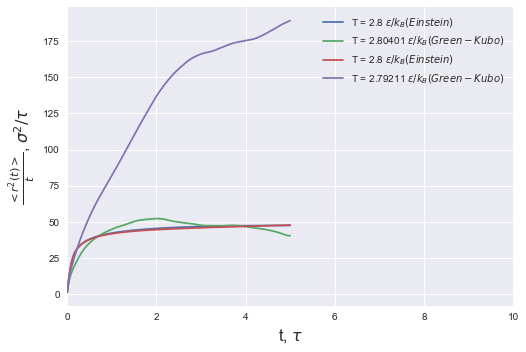

In [9]:
for i, temperature in enumerate(temperatures):
    diff_data_1 = einstein_diffusion_data[f'{temperature:.5f}']
    diff_data_2 = green_kubo_diffusion_data[f'{temperature:.5f}']
    plt.plot(
        einstein_diffusion_data['time'],
        diff_data_1 / einstein_diffusion_data['time'], 
        label=f'T = {temperature:.1f} $\epsilon / k_B (Einstein)$',
    );
    plt.plot(
        green_kubo_diffusion_data['time'],
        diff_data_2, 
        label=f'T = {temperature:.5f} $\epsilon / k_B (Green-Kubo)$',
    );
    
plt.xlabel(r't, $\tau$', fontsize=16);
plt.ylabel(r'$\frac{<r^2(t)>}{t}$, $\sigma^2 / \tau$', fontsize=16);
plt.xlim(
    left=0, 
    right=10,
);
plt.ylim(
#     bottom=0, 
#     top=0.1,
);
plt.legend();

#### Извлечение параметров системы из файла

In [10]:
system_parameters = pd.read_csv(parameters_filename, sep=';')

for column in system_parameters.columns:
    system_parameters[column] = system_parameters[column].round(5)

system_parameters

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\farhutdinov.a\\Documents\\Albert\\git_reps\\molecular_dynamics\\data\\2020-12-21\\system_parameters.csv'

In [ ]:
times = (system_parameters.index + 1) * 0.005

#### Зависимость температуры системы от времени

In [ ]:
plt.scatter(
    times,
    system_parameters['temperature'],
    s=1,
);
plt.xlabel(r'Time, $\tau$', fontsize=16);
plt.ylabel(r'Temperature, $\epsilon / k_B$', fontsize=16);

plt.ylim(
#     bottom=2.75,
#     top=2.85,
);

#### Зависимость давления системы от времени

In [ ]:
plt.scatter(
    times,
    system_parameters['pressure'],
    s=1,
);
plt.xlabel(r'Time, $\tau$', fontsize=16);
plt.ylabel(r'Pressure, $\epsilon / \sigma^3 $', fontsize=16);

plt.ylim(
#     bottom=3.5,
#     top=5.5,
);

#### Зависимость кинетической энергии системы от времени

In [ ]:
plt.scatter(
    times,
    system_parameters['system_kinetic_energy'],
    s=1,
);
plt.xlabel(r'Time, $\tau$', fontsize=16);
plt.ylabel(r'Kinetic Energy, $\epsilon$', fontsize=16);

# plt.ylim(
#     bottom=-6000,
#     top=4000,
# );

#### Зависимость потенциальной энергии системы от времени

In [ ]:
plt.scatter(
    times,
    system_parameters['potential_energy'],
    s=1,
);
plt.xlabel(r'Time, $\tau$', fontsize=16);
plt.ylabel(r'Potential Energy, $\epsilon$', fontsize=16);

plt.ylim(
#     bottom=-6000,
#     top=4000,
);

#### Зависимость полной энергии системы от времени

In [ ]:
plt.scatter(
    times,
    system_parameters['total_energy'],
    s=1,
);
plt.xlabel(r'Time, $\tau$', fontsize=16);
plt.ylabel(r'Total Energy, $\epsilon$', fontsize=16);

plt.ylim(
#     bottom=-6000,
    top=2000,
);

#### Энергии на одном графике

In [ ]:
plt.scatter(
    times,
    system_parameters['system_kinetic_energy'],
    s=1,
    label='kinetic_energy',
);
plt.scatter(
    times,
    system_parameters['potential_energy'],
    s=1,
    label='potential_energy',
);
plt.scatter(
    times,
    system_parameters['total_energy'],
    s=1,
    label='total_energy',
);

plt.xlabel(r'Time, $\tau$', fontsize=16);
plt.ylabel(r'Energy, $\epsilon$', fontsize=16);
plt.legend();

plt.ylim(
#     bottom=-6000,
#     top=2000,
);